In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown

import scipy.stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
verra_df = pd.read_csv('data/verra.csv')
verra_df.head()

,Issuance Date,Sustainable Development Goals,Vintage Start,Vintage End,ID,Name,Country/Area,Project Type,Methodology,Total Vintage Quantity,Quantity Issued,Serial Number,Additional Certifications,Retirement/Cancellation Date,Retirement Beneficiary,Retirement Reason,Retirement Details,is Toucan
0,2024-02-20,NaN,2022-12-01,2022-12-31,2309,Henrietta solar PV project,Mauritius,Energy industries (renewable/non-renewable sou...,ACM0002,2517,2517,16319-755958735-755961251-VCS-VCU-1491-VER-MU-...,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-20,NaN,2023-01-01,2023-05-31,2309,Henrietta solar PV project,Mauritius,Energy industries (renewable/non-renewable sou...,ACM0002,8360,8360,16320-755961252-755969611-VCS-VCU-1491-VER-MU-...,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-19,NaN,2013-01-01,2013-12-31,1122,April Salumei REDD Project,Papua New Guinea,Agriculture Forestry and Other Land Use,VM0007; VM0010,129972,10000,16301-755074262-755084261-VCS-VCU-352-VER-PG-1...,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-19,NaN,2022-01-01,2022-12-31,1812,VTRM Renewable Energy,Brazil,Energy industries (renewable/non-renewable sou...,ACM0002,409442,409442,16302-755084262-755493703-VCS-VCU-1491-VER-BR-...,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-19,NaN,2023-01-01,2023-08-31,1856,Bundled Wind Power Project by Sembcorp Green I...,India,Energy industries (renewable/non-renewable sou...,ACM0002,145996,145996,16303-755493704-755639699-VCS-VCU-997-VER-IN-1...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
verra_df = verra_df.sort_values(by='Issuance Date')

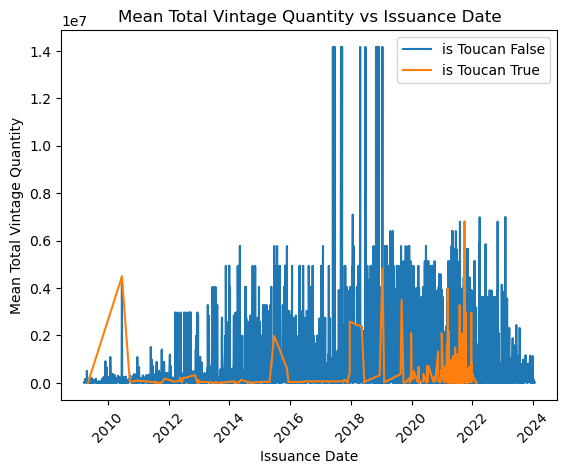

In [7]:
import matplotlib.pyplot as plt

# Convert 'Issuance Date' to datetime
verra_df['Issuance Date'] = pd.to_datetime(verra_df['Issuance Date'])

# Separate DataFrames for True and False 'is Toucan'
is_toucan_true = verra_df[verra_df['is Toucan'] == True]
is_toucan_false = verra_df[verra_df['is Toucan'] == False]

# Plot 'Issuance Date' against 'Total Vintage Quantity' for False 'is Toucan'
plt.plot(is_toucan_false['Issuance Date'], is_toucan_false['Total Vintage Quantity'], label='is Toucan False')


# Plot 'Issuance Date' against 'Total Vintage Quantity' for True 'is Toucan'
plt.plot(is_toucan_true['Issuance Date'], is_toucan_true['Total Vintage Quantity'], label='is Toucan True')


# Set labels and title
plt.xlabel('Issuance Date')
plt.ylabel('Mean Total Vintage Quantity')
plt.title('Mean Total Vintage Quantity vs Issuance Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

# Convert 'Issuance Date' to datetime
verra_df['Issuance Date'] = pd.to_datetime(verra_df['Issuance Date'])

# Group by 'Issuance Date' and 'is Toucan', and calculate the mean 'Total Vintage Quantity'

# Separate DataFrames for True and False 'is Toucan'
is_toucan_true = verra_df[verra_df['is Toucan'] == True]
is_toucan_false = verra_df[verra_df['is Toucan'] == False]

# Linear regression for True 'is Toucan'
true_x = is_toucan_true['Issuance Date'].values.astype('datetime64[ns]').astype(np.int64).reshape(-1, 1)
true_y = is_toucan_true['Total Vintage Quantity'].values.reshape(-1, 1)
true_model = LinearRegression().fit(true_x, true_y)
true_y_pred = true_model.predict(true_x)

# Linear regression for False 'is Toucan'
false_x = is_toucan_false['Issuance Date'].values.astype('datetime64[ns]').astype(np.int64).reshape(-1, 1)
false_y = is_toucan_false['Total Vintage Quantity'].values.reshape(-1, 1)
false_model = LinearRegression().fit(false_x, false_y)
false_y_pred = false_model.predict(false_x)


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Print coefficients and intercept for True 'is Toucan'
print("Coefficients for True 'is Toucan':", true_model.coef_)
print("Intercept for True 'is Toucan':", true_model.intercept_)

# Print coefficients and intercept for False 'is Toucan'
print("Coefficients for False 'is Toucan':", false_model.coef_)
print("Intercept for False 'is Toucan':", false_model.intercept_)

# Evaluate model performance
print("\nPerformance Metrics for True 'is Toucan':")
print("R-squared:", r2_score(true_y, true_y_pred))
print("Mean Squared Error:", mean_squared_error(true_y, true_y_pred))
print("Mean Absolute Error:", mean_absolute_error(true_y, true_y_pred))

print("\nPerformance Metrics for False 'is Toucan':")
print("R-squared:", r2_score(false_y, false_y_pred))
print("Mean Squared Error:", mean_squared_error(false_y, false_y_pred))
print("Mean Absolute Error:", mean_absolute_error(false_y, false_y_pred))


Coefficients for True 'is Toucan': [[-2.79516016e-12]]
Intercept for True 'is Toucan': [4955709.74657861]
Coefficients for False 'is Toucan': [[-8.95162146e-14]]
Intercept for False 'is Toucan': [1092007.38174465]

Performance Metrics for True 'is Toucan':
R-squared: 0.08300499171639963
Mean Squared Error: 739954778822.1234
Mean Absolute Error: 576180.5941896733

Performance Metrics for False 'is Toucan':
R-squared: 5.349477892147014e-05
Mean Squared Error: 1993266143984.3284
Mean Absolute Error: 921824.1814588694


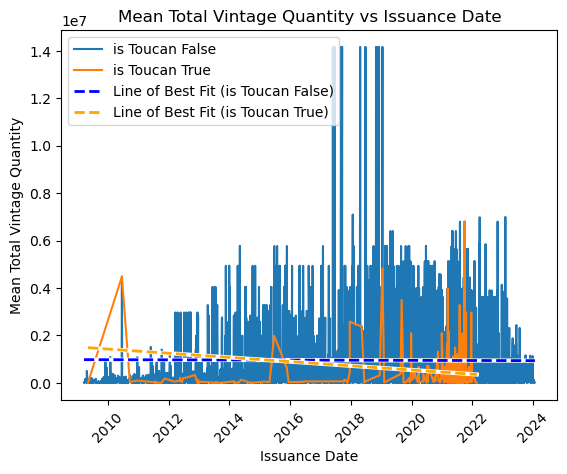

In [10]:

# Plot 'Issuance Date' against 'Total Vintage Quantity' for False 'is Toucan'
plt.plot(is_toucan_false['Issuance Date'], is_toucan_false['Total Vintage Quantity'], label='is Toucan False')

# Plot 'Issuance Date' against 'Total Vintage Quantity' for True 'is Toucan'
plt.plot(is_toucan_true['Issuance Date'], is_toucan_true['Total Vintage Quantity'], label='is Toucan True')

# Plot lines of best fit with white outline
plt.plot(is_toucan_false['Issuance Date'], false_y_pred, color='white', linestyle='-', linewidth=3)
plt.plot(is_toucan_false['Issuance Date'], false_y_pred, color='blue', linestyle='--', linewidth=2, label='Line of Best Fit (is Toucan False)')

plt.plot(is_toucan_true['Issuance Date'], true_y_pred, color='white', linestyle='-', linewidth=3)
plt.plot(is_toucan_true['Issuance Date'], true_y_pred, color='orange', linestyle='--', linewidth=2, label='Line of Best Fit (is Toucan True)')

# Set labels and title
plt.xlabel('Issuance Date')
plt.ylabel('Mean Total Vintage Quantity')
plt.title('Mean Total Vintage Quantity vs Issuance Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.show()



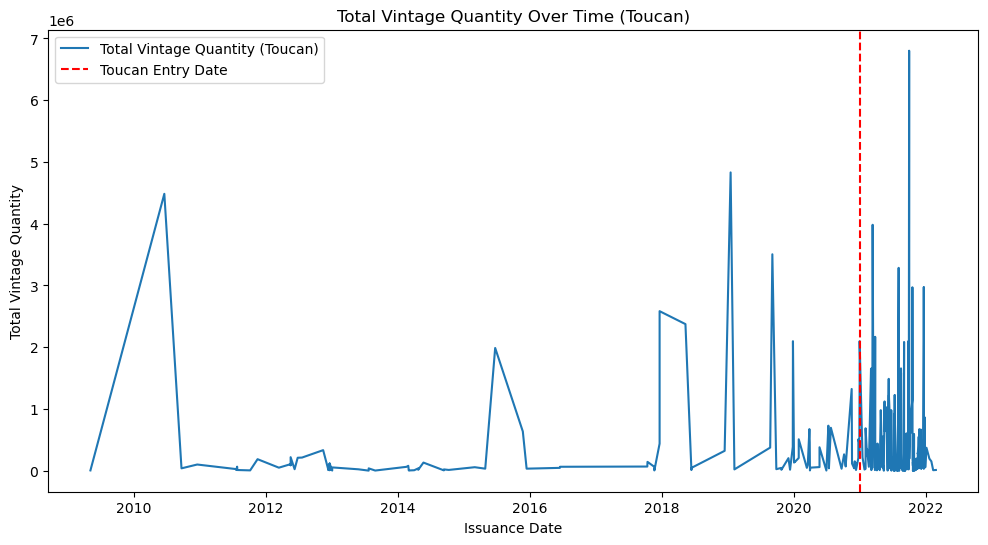

T-Statistic: 3.5205194115785345
P-Value: 0.0004530958561165637


In [12]:
# Filter data for when 'is_toucan' is True
toucan_data = verra_df[verra_df['is Toucan'] == True]

# Plot total vintage quantity over time for Toucan
plt.figure(figsize=(12, 6))
plt.plot(toucan_data['Issuance Date'], toucan_data['Total Vintage Quantity'], label='Total Vintage Quantity (Toucan)')
plt.axvline(toucan_entry_date, color='red', linestyle='--', label='Toucan Entry Date')
plt.xlabel('Issuance Date')
plt.ylabel('Total Vintage Quantity')
plt.title('Total Vintage Quantity Over Time (Toucan)')
plt.legend()
plt.show()

# Segment data into periods before and after Toucan entry
before_toucan = toucan_data[toucan_data['Issuance Date'] < toucan_entry_date]
after_toucan = toucan_data[toucan_data['Issuance Date'] >= toucan_entry_date]

# Perform statistical analysis (e.g., t-test) to compare total vintage quantity before and after Toucan entry
t_statistic, p_value = scipy.stats.ttest_ind(before_toucan['Total Vintage Quantity'], after_toucan['Total Vintage Quantity'])
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


Interpretation:

Since the p-value (0.0004530958561165637) is much lower than a typical significance level like 0.05, we reject the null hypothesis.
Therefore, we can conclude that there is a statistically significant difference in the total vintage quantity before and after Toucan entered the market.
Additionally, the positive t-statistic (3.5205194115785345) indicates that the total vintage quantity after Toucan entry is significantly higher than before Toucan entry, given that the coefficient is positive.